In [1]:
import pandas as pd 



df = pd.read_csv(r"D:\Customer_Segmentation_Project\Data\Mall_Customers.csv")
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

Renaming the incorrect column name 


In [3]:
df.rename(columns = {'Genre':'Gender'},inplace=True)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Exploratory Data Analysis

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df['Gender'].unique()

df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

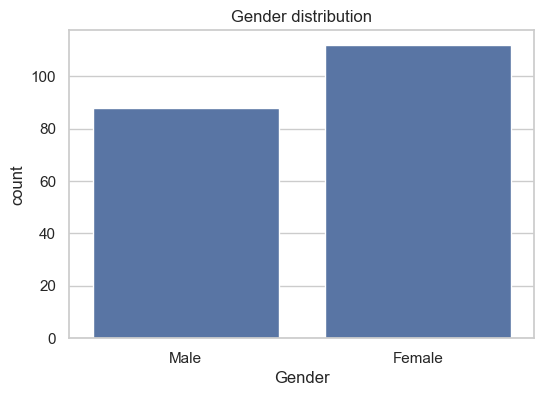

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style = "whitegrid")
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df)
plt.title("Gender distribution")
plt.show()

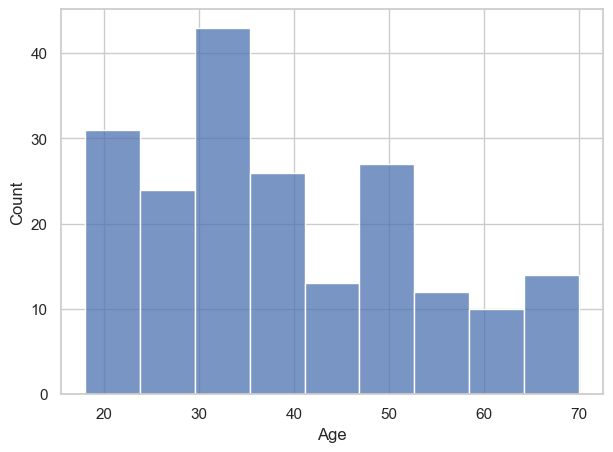

In [9]:
plt.figure(figsize=(7,5))
sns.histplot(x='Age', data=df)
plt.show()

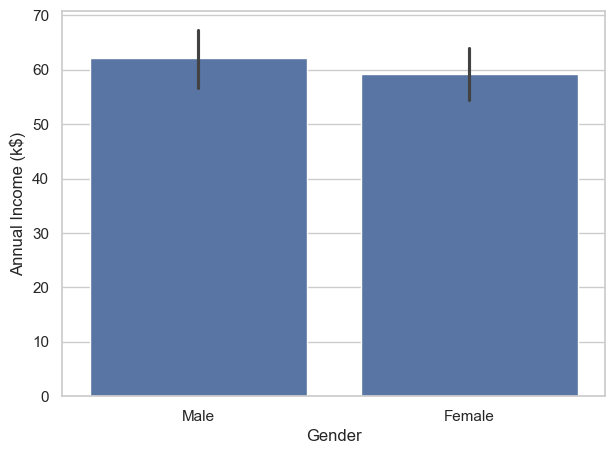

In [10]:
plt.figure(figsize=(7,5))
sns.barplot(x='Gender',y='Annual Income (k$)',data=df)
plt.show()

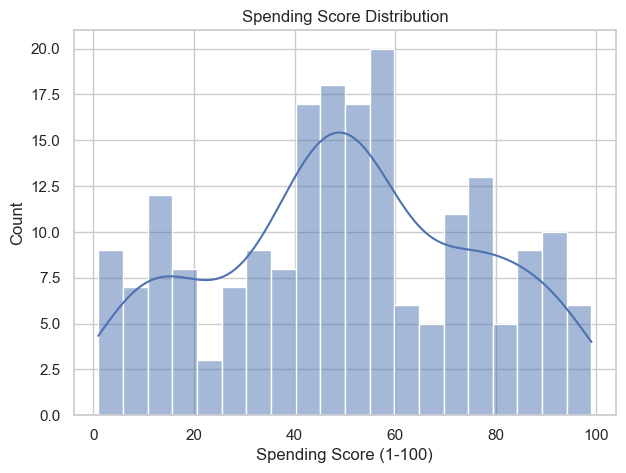

In [11]:
plt.figure(figsize=(7,5))
sns.histplot(df['Spending Score (1-100)'],kde =True, bins = 20)
plt.title("Spending Score Distribution")
plt.show()

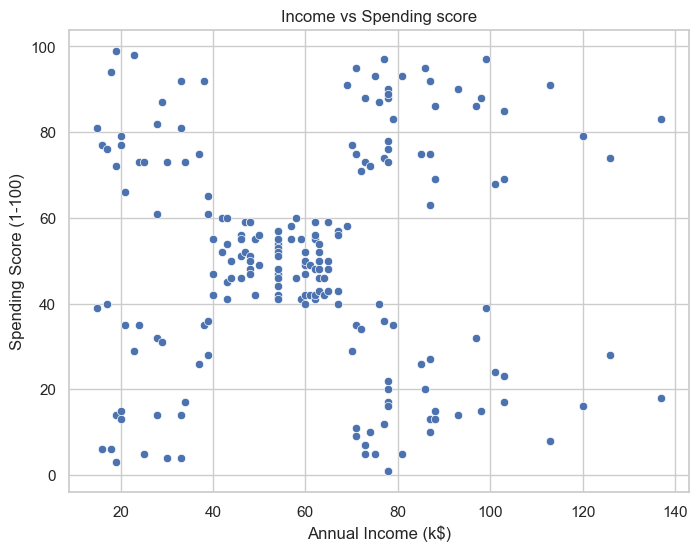

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="Annual Income (k$)",y="Spending Score (1-100)",data = df)
plt.title("Income vs Spending score")
plt.show()

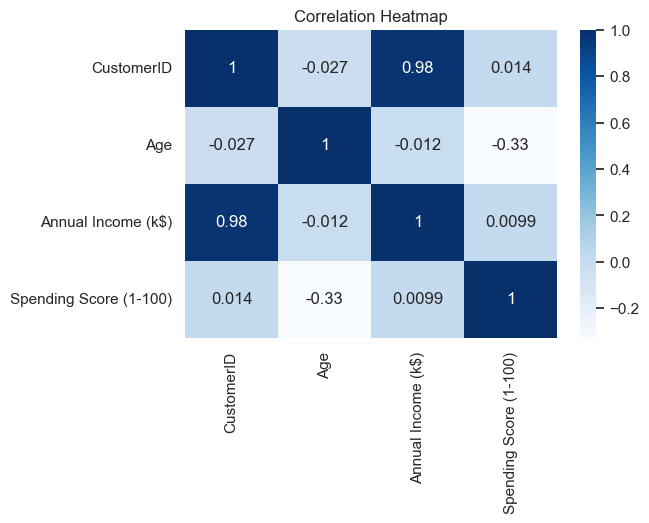

In [13]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True,cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()

K - MEANS CLUSTERING

In [14]:
X = df[["Annual Income (k$)","Spending Score (1-100)"]]
X.head(5)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

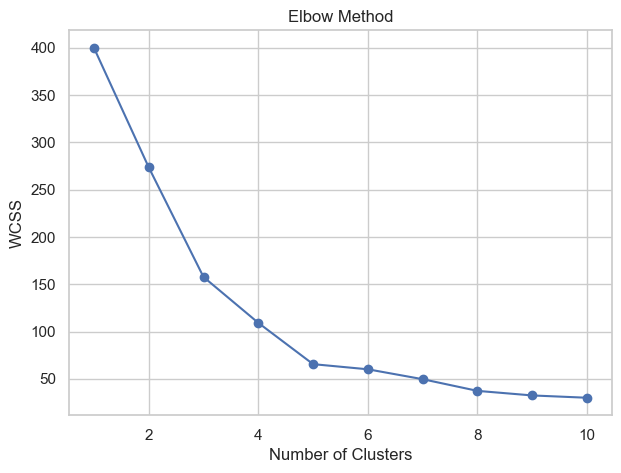

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state = 42)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(7,5))
plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
kmeans = KMeans(n_clusters = 5,init = 'k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(x_scaled)


df['Cluster'] = y_kmeans
df[['Annual Income (k$)','Spending Score (1-100)', 'Cluster']].head()

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4


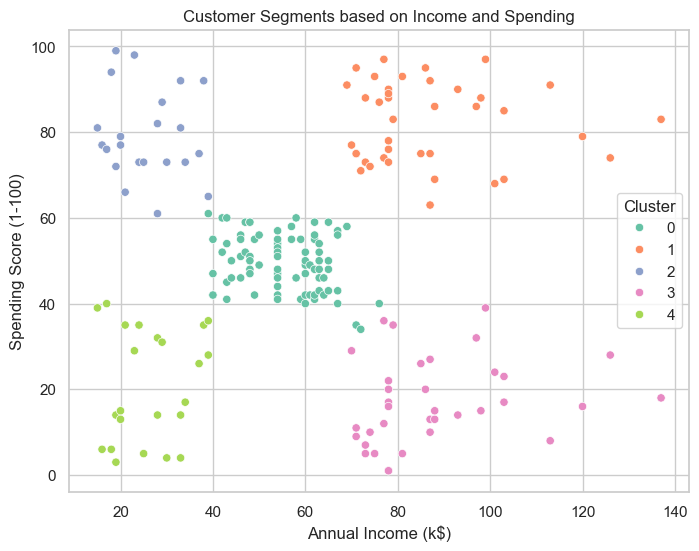

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)', hue='Cluster',data=df, palette='Set2')
plt.title('Customer Segments based on Income and Spending')
plt.show()

In [19]:
df.groupby('Cluster')[['Annual Income (k$)','Spending Score (1-100)']].agg(['mean','count'])

Annual Income (k$)       Spending Score (1-100)      
                      mean count                   mean count
Cluster                                                      
0                55.296296    81              49.518519    81
1                86.538462    39              82.128205    39
2                25.727273    22              79.363636    22
3                88.200000    35              17.114286    35
4                26.304348    23              20.913043    23

In [20]:
cluster_names = {
    0:'Regular Customers',
    1:'High Income Low Spenders',
    2:'High Income High Spenders',
    3:'Low Income High Spenders',
    4:'Low Income Low Spenders'
}

df['Segment'] = df['Cluster'].map(cluster_names)



df[['Cluster','Segment']].head()

,Cluster,Segment
0,4,Low Income Low Spenders
1,2,High Income High Spenders
2,4,Low Income Low Spenders
3,2,High Income High Spenders
4,4,Low Income Low Spenders


In [21]:
df.rename(columns={
    'CustomerID': 'customer_id',
    'Gender': 'gender',
    'Age': 'customer_age',
    'Annual Income (k$)': 'annual_income',
    'Spending Score (1-100)': 'spending_score'
}, inplace=True)




df.to_csv("D:/Customer_Segmentation_Project/Data/Mall_Customers.csv",index=False)